In [1]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns
from scipy import stats
Data = pd.read_csv ('bebe.csv')
df = pd.DataFrame ( data = Data )
print ( df.describe () )

                 X          bwt    gestation       parity          age  \
count  1174.000000  1174.000000  1174.000000  1174.000000  1174.000000   
mean    587.500000  3386.702747   279.101363     0.262351    27.228279   
std     339.048915   519.608671    16.010305     0.440100     5.817839   
min       1.000000  1559.222500   148.000000     0.000000    15.000000   
25%     294.250000  3061.746000   272.000000     0.000000    23.000000   
50%     587.500000  3401.940000   280.000000     0.000000    26.000000   
75%     880.750000  3713.784500   288.000000     1.000000    31.000000   
max    1174.000000  4989.512000   353.000000     1.000000    45.000000   

            height       weight        smoke  
count  1174.000000  1174.000000  1174.000000  
mean    162.685486    58.276913     0.390971  
std       6.416298     9.404905     0.488176  
min     134.620000    39.462504     0.000000  
25%     157.480000    51.822886     0.000000  
50%     162.560000    56.699000     0.000000  
75% 

50% c'est la médianne
25% et 75% c'est l'ecart type

b)Il n'y a pas d'indication immédiate de valeurs manquantes, mais leur présence serait problématique car :
1. Un modèle d’arbre ne sait pas gérer les valeurs manquantes directement.
2. Une absence de données peut biaiser les splits et fausser la prédiction.
3. Il faudrait les gérer par imputation (moyenne, médiane, ou modèle de remplacement).

In [2]:
mydf = df . drop ( 'X' , axis =1)
print ( mydf.head () )

         bwt  gestation  parity  age  height     weight  smoke
0  3401.9400        284       0   27  157.48  45.359200      0
1  3203.4935        282       0   33  162.56  61.234920      0
2  3628.7360        279       0   28  162.56  52.163080      1
3  3061.7460        282       0   23  170.18  56.699000      1
4  3855.5320        286       0   25  157.48  42.184056      0


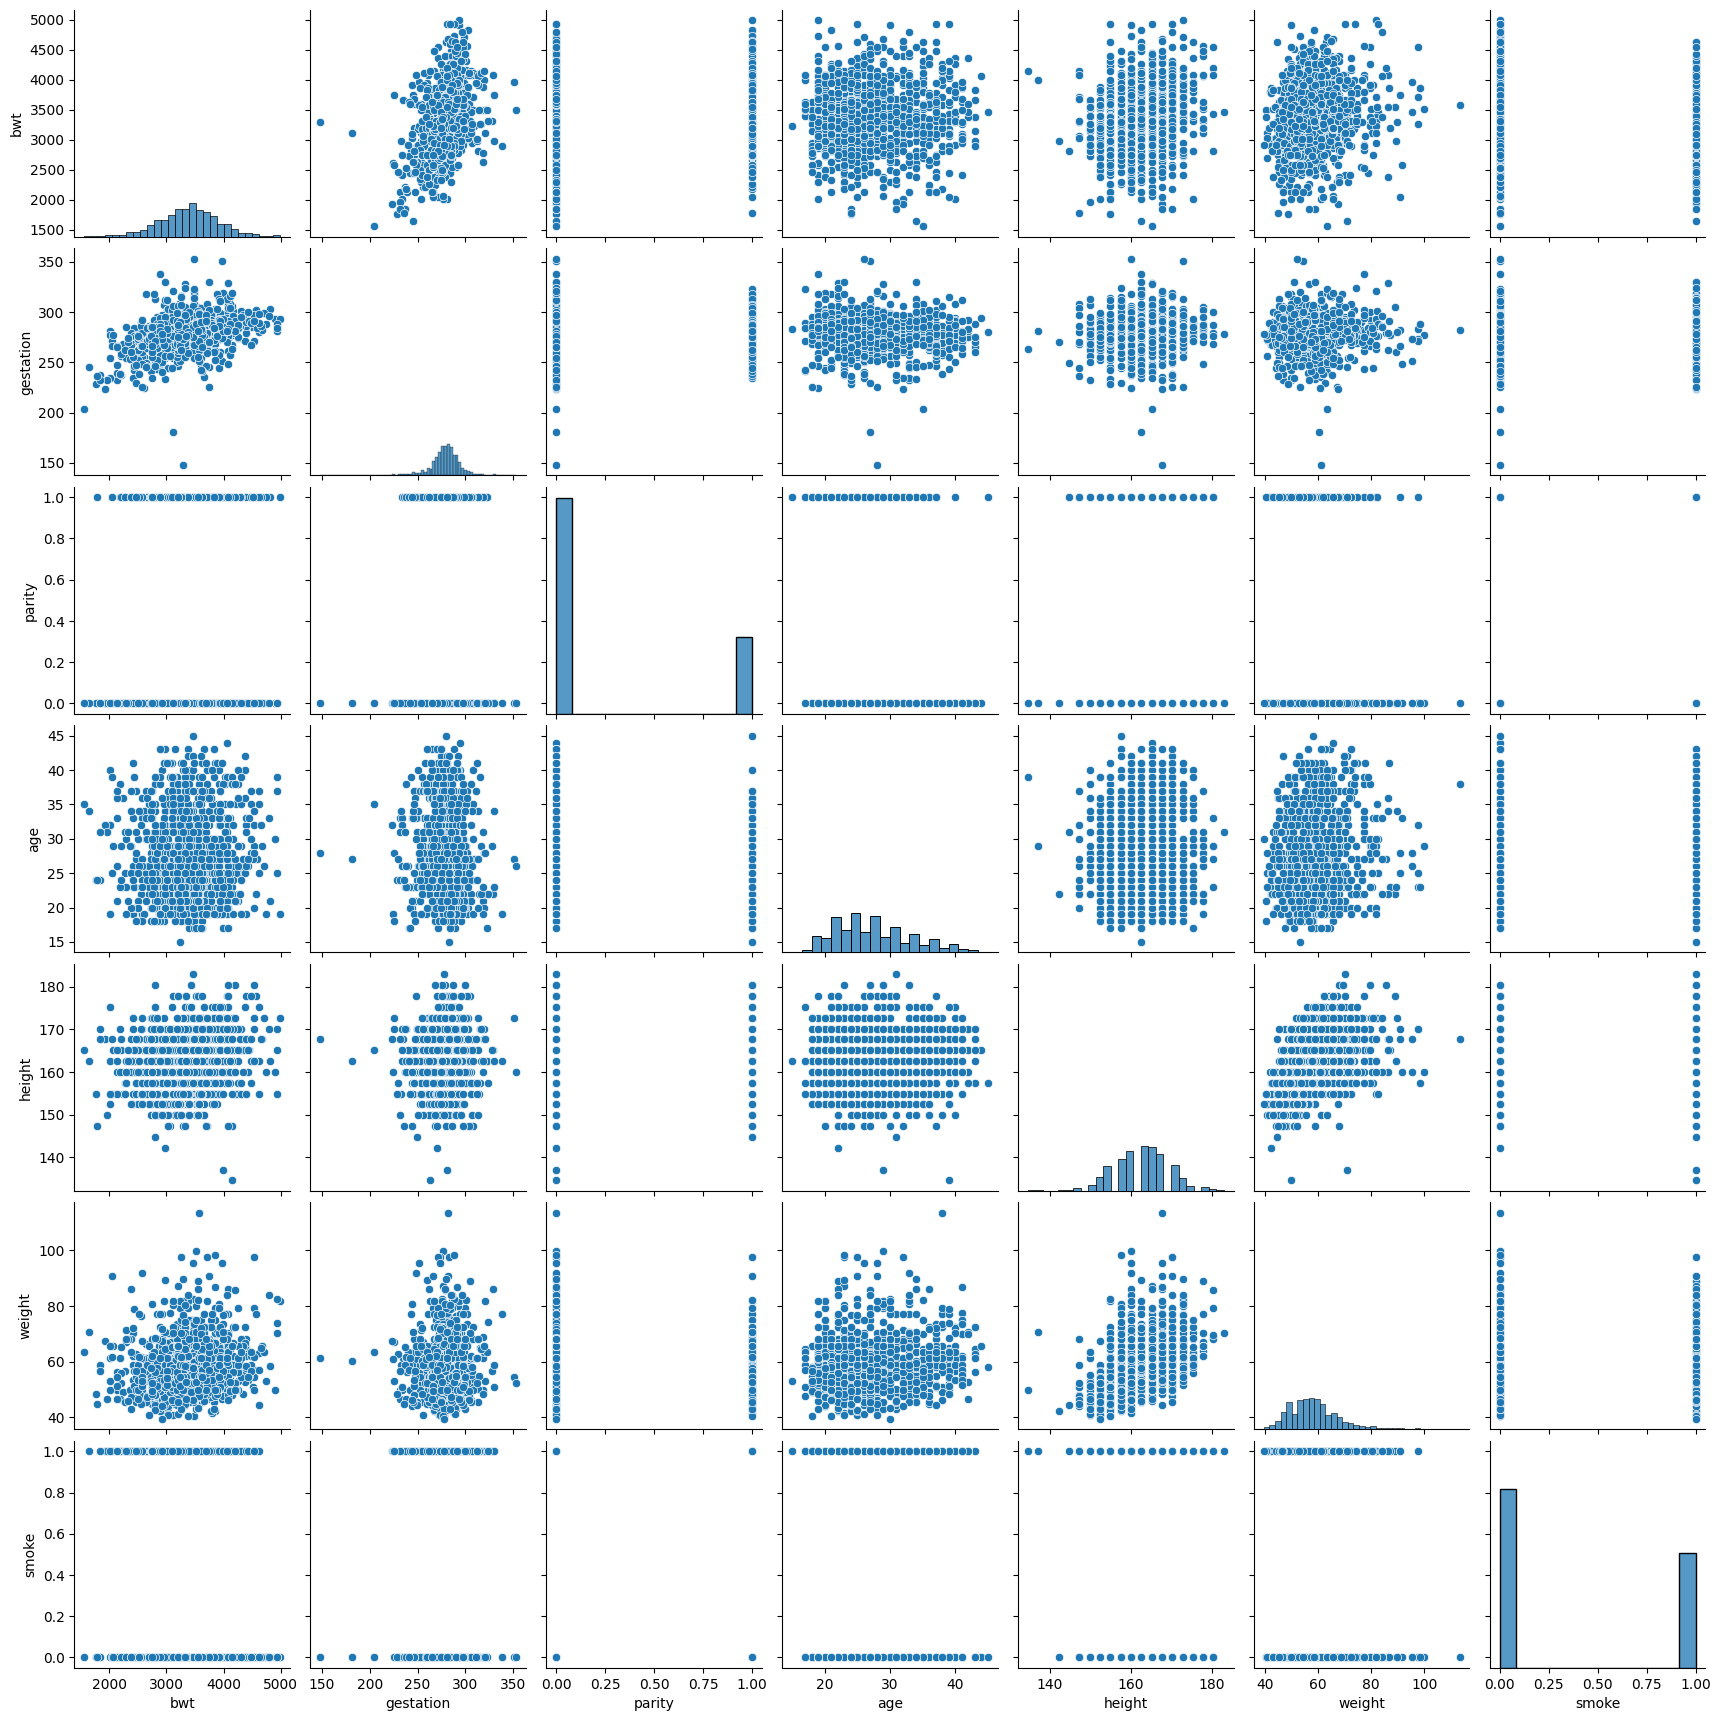

In [3]:
sns.pairplot ( mydf )

a) Forte corrélation entre variables :
- `bwt` est fortement corrélé avec `gestation` et `weight` (plus la grossesse est longue et la mère lourde, plus le bébé est grand).
- `height` et `weight` sont également corrélés (plus une mère est grande, plus elle est susceptible d’être plus lourde).

b) Faibles corrélations :
- `parity` et `bwt` semblent faiblement liés (être premier enfant n’influence pas tant que ça le poids de naissance).
- `smoke` et `bwt` montrent une légère tendance, mais l’effet semble limité.

 c) Plus de mères fumeuses ou non-fumeuses ?
Il y a plus de **non-fumeuses** dans l’échantillon.
d) Séparation des données :
- **Train/Test Split** à 70% pour l'entraînement et 30% pour le test avec `random_state=42` :

In [11]:
from sklearn.model_selection import train_test_split
X = mydf.drop(['bwt'],axis=1)
Y = df['bwt']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

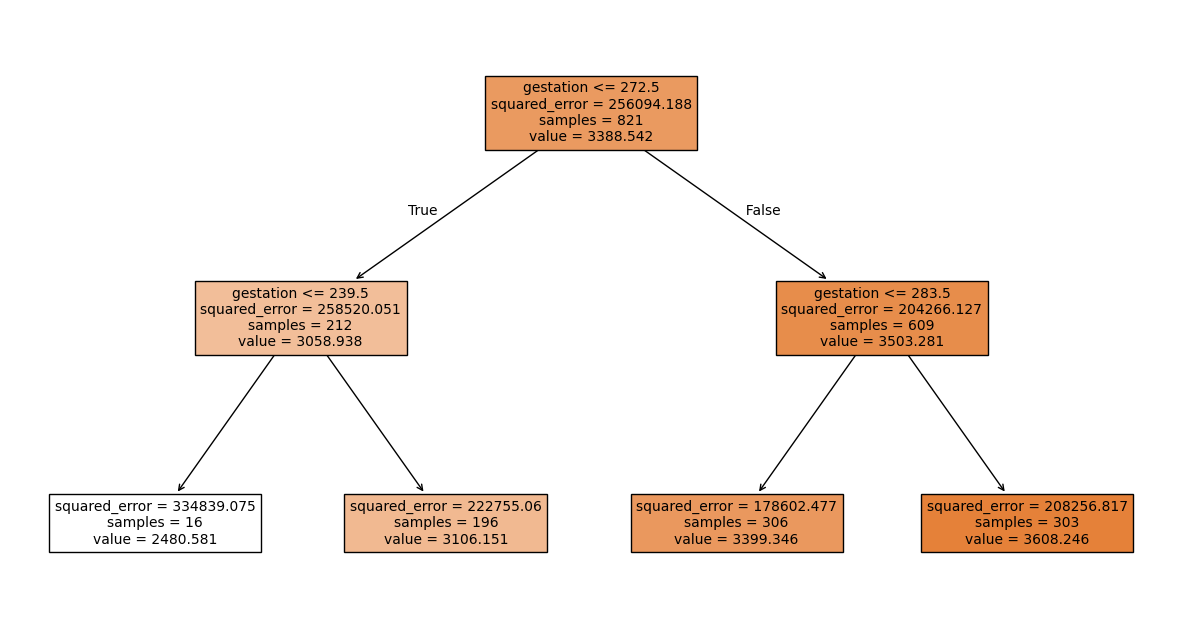

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))  # Ajuste la taille du graphique
plot_tree(regr_1, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

a) Commentaire de l’arbre obtenu :
L’arbre coupe principalement selon la variable **gestation** en premier split, puis **weight**. Cela signifie que ces variables sont les plus discriminantes.

### b) Calcul du R² et de la MSE :


In [ ]:
R^2 = 1 -rac{SCE}{SCT}
MSE =rac{1}{n} \sum (y_reel - y_pred)^2 


En utilisant `sklearn.metrics`, on retrouve les mêmes résultats avec :


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)


```

### c) Commentaire sur le R² :
- Si \( R^2 \) est **faible**, le modèle est sous-ajusté (*underfitting*).
- Si \( R^2 \) est **très élevé sur train et faible sur test**, le modèle est sur-ajusté (*overfitting*).
- Ici, on doit comparer \( R^2 \) entre train et test pour conclure.

### d) Commentaire sur le graphe :
- Si les points sont bien alignés, le modèle est bon.
- Si la dispersion est forte, l’arbre est trop simpliste et d'autres modèles pourraient mieux marcher.